In [1]:
#Generating Word Clouds in python
#EDA for NLP using Word CLoud
#create a basic word cloud from several documents
#adjust color, size, number of text inside cloud
#mask cloud into any shape, color, pattern

In [2]:
'''packages used:
1. numpy: library to handle multi-dimensional arrays and matrices. Used to do data analysis.
2.pandas
3. matplotlib: for visualization
4. pillow: wrapper for Python Imaging Library. Read in image as the mask for the word cloud.
5. wordcloud: git clone https://github.com/amueller/word_cloud.git
cd word_cloud
pip install .'''

'packages used:\n1. numpy: library to handle multi-dimensional arrays and matrices. Used to do data analysis.\n2.pandas\n3. matplotlib: for visualization\n4. pillow: wrapper for Python Imaging Library. Read in image as the mask for the word cloud.\n5. wordcloud: git clone https://github.com/amueller/word_cloud.git\ncd word_cloud\npip install .'

In [3]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
# Load in the dataframe
df = pd.read_csv("Crop_recommendation.csv", index_col=0)

In [7]:
df.head()

,P,K,temperature,humidity,ph,rainfall,label
N,,,,,,,
90,42,43,20.879744,82.002744,6.502985,202.935536,rice
85,58,41,21.770462,80.319644,7.038096,226.655537,rice
60,55,44,23.004459,82.320763,7.840207,263.964248,rice
74,35,40,26.491096,80.158363,6.980401,242.864034,rice
78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [8]:
print("There are {} observations and {} features in this dataset. \n".format(df.shape[0],df.shape[1]))

print("There are {} types of wine in this dataset such as {}... \n".format(len(df.label.unique()),
                                                                           ", ".join(df.label.unique()[0:5])))



There are 2200 observations and 7 features in this dataset. 

There are 22 types of wine in this dataset such as rice, maize, chickpea, kidneybeans, pigeonpeas... 



In [9]:
df[["label"]].head()

,label
N,
90,rice
85,rice
60,rice
74,rice
78,rice


In [10]:
# Groupby by country
country = df.groupby("label")

# Summary statistic of all countries
country.describe()

P                                                         \
             count    mean       std    min     25%    50%     75%    max   
label                                                                       
apple        100.0  134.22  8.139665  120.0  126.75  136.5  141.00  145.0   
banana       100.0   82.01  7.690339   70.0   75.00   81.0   88.00   95.0   
blackgram    100.0   67.47  7.151259   55.0   62.00   67.0   74.00   80.0   
chickpea     100.0   67.79  7.498545   55.0   61.00   68.0   74.00   80.0   
coconut      100.0   16.93  8.357244    5.0    9.75   15.5   24.25   30.0   
coffee       100.0   28.74  7.276113   15.0   23.00   29.0   34.25   40.0   
cotton       100.0   46.24  7.348634   35.0   40.00   46.0   52.00   60.0   
grapes       100.0  132.53  7.619029  120.0  125.75  133.0  139.00  145.0   
jute         100.0   46.86  7.195706   35.0   41.00   46.0   53.25   60.0   
kidneybeans  100.0   67.54  7.571104   55.0   61.00   67.0   74.00   80.0   
lentil       100.0   68.36  7.335427   55.0   61.75   68.0   75.00   80.0   
maize        100.0   48.44  8.010498   35.0   42.75   48.5   56.00   60.0   
mango        100.0   27.18  7.663873   15.0   19.75   27.5   35.00   40.0   
mothbeans    100.0   48.01  7.547151   35.0   42.75   48.5   55.00   60.0   
mungbean     100.0   47.28  7.870261   35.0   40.00   47.0   54.25   60.0   
muskmelon    100.0   17.72  7.187363    5.0   12.00   18.0   25.00   30.0   
orange       100.0   16.55  7.691495    5.0    9.00   16.0   23.00   30.0   
papaya       100.0   59.05  7.057305   46.0   54.00   60.0   65.00   70.0   
pigeonpeas   100.0   67.73  7.294463   55.0   61.00   69.5   73.25   80.0   
pomegranate  100.0   18.75  7.387370    5.0   13.00   20.0   25.00   30.0   
rice         100.0   47.58  7.904966   35.0   41.00   47.0   54.25   60.0   
watermelon   100.0   17.00  7.535773    5.0   10.00   17.5   23.00   30.0   

                 K          ...        ph           rainfall              \
             count    mean  ...       75%       max    count        mean   
label                       ...                                            
apple        100.0  199.89  ...  6.135616  6.499227    100.0  112.654779   
banana       100.0   50.05  ...  6.211092  6.490074    100.0  104.626980   
blackgram    100.0   19.24  ...  7.419390  7.775306    100.0   67.884151   
chickpea     100.0   79.92  ...  7.861625  8.868741    100.0   80.058977   
coconut      100.0   30.59  ...  6.209201  6.470466    100.0  175.686646   
coffee       100.0   29.94  ...  7.132105  7.493192    100.0  158.066295   
cotton       100.0   19.56  ...  7.426792  7.994680    100.0   80.398043   
grapes       100.0  200.11  ...  6.313711  6.499605    100.0   69.611829   
jute         100.0   39.99  ...  7.126526  7.488014    100.0  174.792798   
kidneybeans  100.0   20.05  ...  5.868351  5.998125    100.0  105.919778   
lentil       100.0   19.41  ...  7.394295  7.841496    100.0   45.680454   
maize        100.0   19.79  ...  6.602366  6.995844    100.0   84.766988   
mango        100.0   29.92  ...  6.416573  6.967418    100.0   94.704515   
mothbeans    100.0   20.23  ...  8.366003  9.935091    100.0   51.198487   
mungbean     100.0   19.87  ...  6.982101  7.199495    100.0   48.403601   
muskmelon    100.0   50.08  ...  6.550222  6.781050    100.0   24.689952   
orange       100.0   10.01  ...  7.517194  7.995849    100.0  110.474969   
papaya       100.0   50.04  ...  6.839783  6.993473    100.0  142.627839   
pigeonpeas   100.0   20.29  ...  6.418984  7.445445    100.0  149.457564   
pomegranate  100.0   40.21  ...  6.887951  7.199504    100.0  107.528442   
rice         100.0   39.87  ...  7.039147  7.868475    100.0  236.181114   
watermelon   100.0   50.22  ...  6.756902  6.956509    100.0   50.786219   

                                                                        \
                   std         min         25%         50%         75%   
label                                     

In [11]:
country.mean().sort_values(by="label",ascending=False)

,P,K,temperature,humidity,ph,rainfall
label,,,,,,
watermelon,17.00,50.22,25.591767,85.160375,6.495778,50.786219
rice,47.58,39.87,23.689332,82.272822,6.425471,236.181114
pomegranate,18.75,40.21,21.837842,90.125504,6.429172,107.528442
pigeonpeas,67.73,20.29,27.741762,48.061633,5.794175,149.457564
papaya,59.05,50.04,33.723859,92.403388,6.741442,142.627839
orange,16.55,10.01,22.765725,92.170209,7.016957,110.474969
muskmelon,17.72,50.08,28.663066,92.342802,6.358805,24.689952
mungbean,47.28,19.87,28.525775,85.499975,6.723957,48.403601
mothbeans,48.01,20.23,28.194920,53.160418,6.831174,51.198487


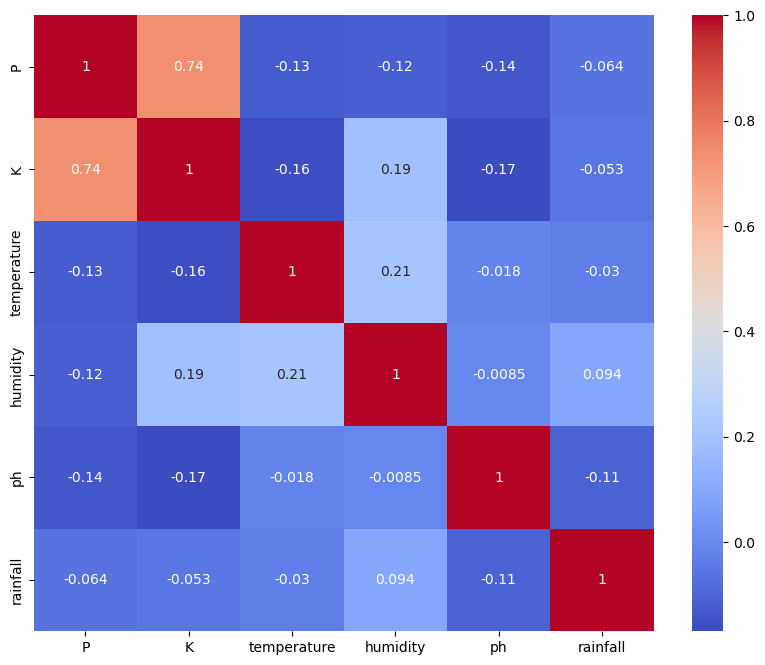

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


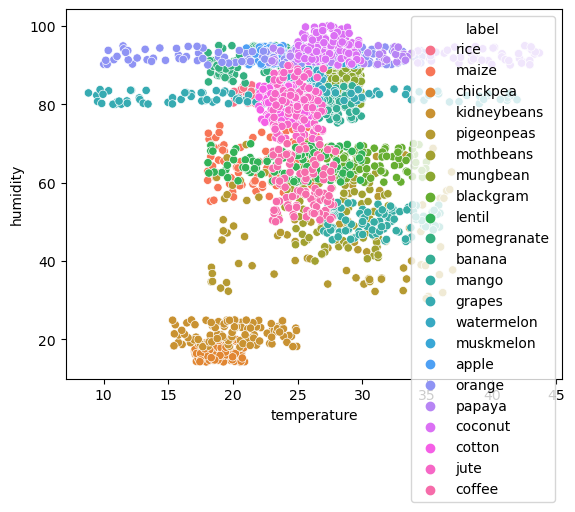

In [13]:
sns.scatterplot(x='temperature', y='humidity', data=df, hue='label')
plt.show()


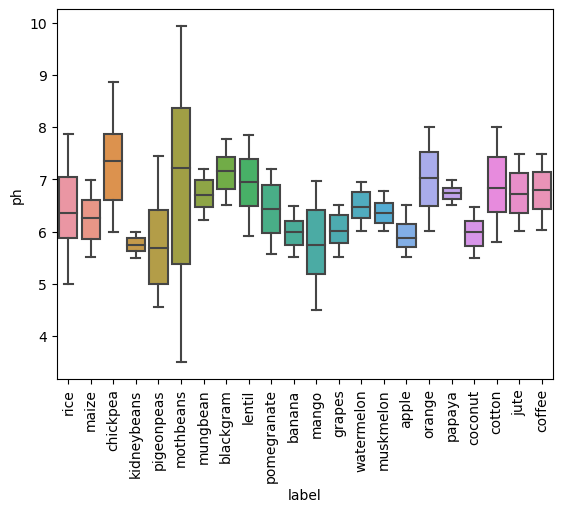

In [14]:
sns.boxplot(x='label', y='ph', data=df)
plt.xticks(rotation=90)
plt.show()


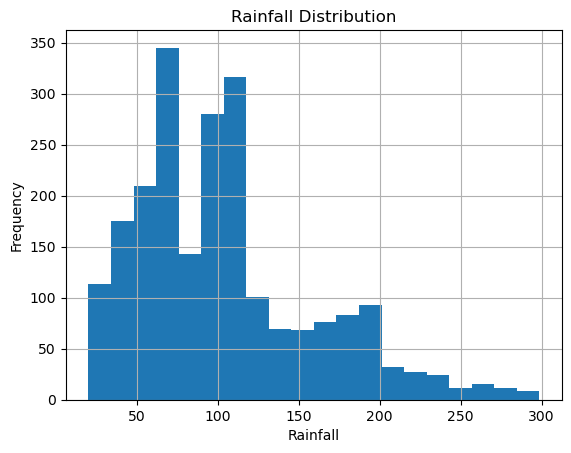

In [15]:
df['rainfall'].hist(bins=20)
plt.title('Rainfall Distribution')
plt.xlabel('Rainfall')
plt.ylabel('Frequency')
plt.show()


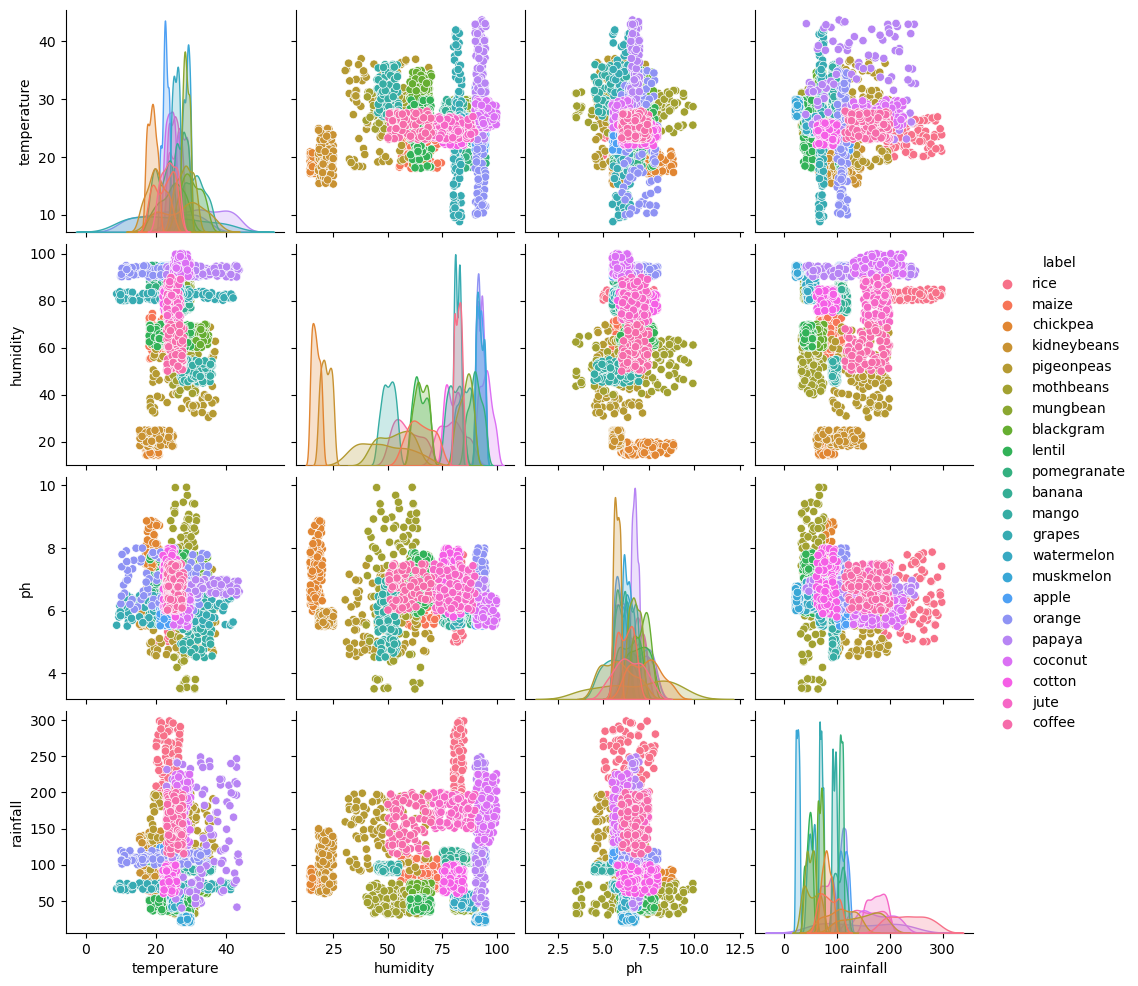

In [16]:
sns.pairplot(df, hue='label', vars=['temperature', 'humidity', 'ph', 'rainfall'])
plt.show()


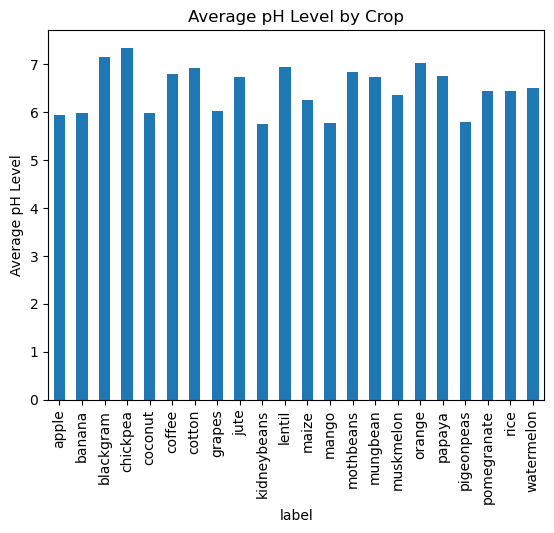

In [17]:
df.groupby('label')['ph'].mean().plot(kind='bar')
plt.title('Average pH Level by Crop')
plt.ylabel('Average pH Level')
plt.xticks(rotation=90)
plt.show()


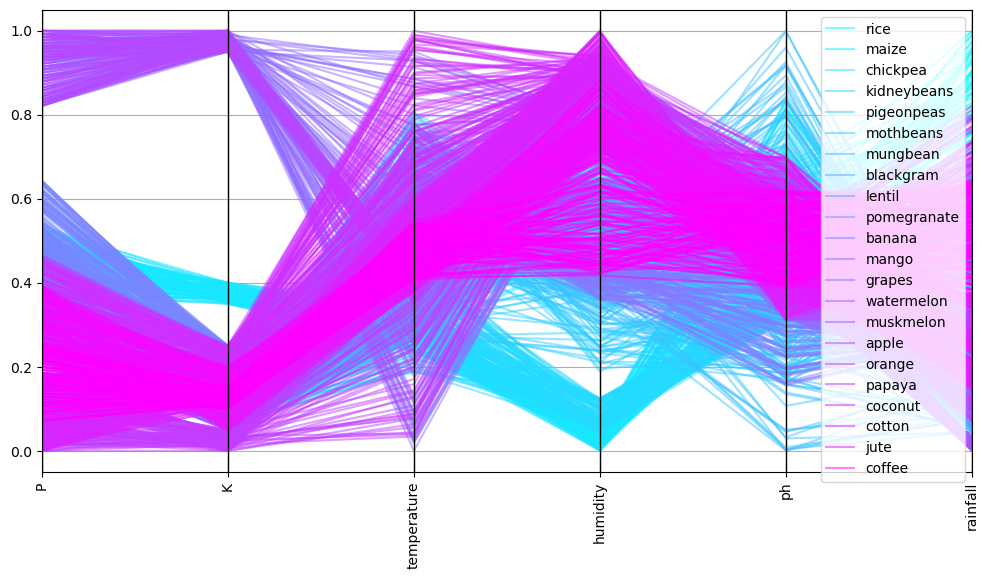

In [18]:
from pandas.plotting import parallel_coordinates

# Normalize data for better visualization
df_normalized = df.copy()
for col in df_normalized.columns[:-1]:  # Exclude 'label'
    df_normalized[col] = (df_normalized[col] - df_normalized[col].min()) / (df_normalized[col].max() - df_normalized[col].min())

plt.figure(figsize=(12, 6))
parallel_coordinates(df_normalized, 'label', colormap='cool', alpha=0.5)
plt.xticks(rotation=90)
plt.show()


In [19]:
?WordCloud

In [21]:
text = df.label[0]